## Observations and Insights 

# Lab: Widget; Notebook: notebook
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
mouse_study.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
grouped_mouse = mouse_study.groupby(["Drug Regimen"])
grouped_mouse.head().count

<bound method DataFrame.count of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
10       f932          0           45.000000                 0     Ketapril   
11       g107          0           45.000000                 0     Ketapril   
12       g107          5           48.791665                 0     Ketapril   
13       g107         10           53.435987                 0     Ketapril   
14       g107         15           58.135545                 0     Ketapril   
63       f993          0           45.000000                 0     Naftisol   
64       f993      

In [3]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].unique()
# Count unique mice by ID (Result:249)
len(mouse_count)
print(mouse_count)

['b128' 'f932' 'g107' 'a457' 'c819' 'h246' 'p189' 'n923' 'q119' 'f993'
 'z234' 'b559' 'y260' 'x930' 'o725' 'z969' 'v835' 'r604' 'n304' 'l700'
 'x336' 'l725' 'm133' 'v295' 'a818' 'y601' 't724' 'k382' 'w422' 'c326'
 'c139' 'v339' 'a577' 'y163' 'k483' 'k804' 'o809' 'z581' 'a251' 'i386'
 'c580' 'q132' 'u327' 'v603' 'f278' 'g497' 'd474' 'o973' 'c832' 'o331'
 'm650' 'v289' 'm550' 'h428' 'r701' 'v199' 'x264' 'f234' 'c458' 'q610'
 'j913' 'a411' 'a444' 'd251' 'j989' 'y449' 'k403' 'c758' 'x402' 'r811'
 'a644' 'i177' 'g791' 'a520' 'u196' 'm546' 'w678' 'n364' 's508' 'e662'
 'z578' 'r921' 'a492' 'w540' 'v764' 'z795' 'e291' 'e584' 'e213' 'j755'
 's565' 'a366' 'p387' 'b879' 'i901' 'k862' 'g867' 's619' 'w697' 'j984'
 'c402' 'h333' 'k510' 'p981' 't451' 'a963' 'm269' 'g989' 'z314' 'o848'
 'v719' 'q597' 'c895' 'a203' 'f394' 'c264' 'n967' 'f545' 'k894' 'k754'
 'g296' 'd164' 'w575' 'x613' 'q633' 'b313' 'f129' 'j365' 'p136' 'c559'
 'a788' 's337' 'q511' 'm331' 'o926' 'd133' 'n630' 'a401' 'w350' 'c302'
 'a897

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study.loc[mouse_study["Mouse ID"]=="g989", ]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study["Mouse ID"] != "g989"]
clean_mouse_study
#new df = full study - dupplicate array variable, isin()
#Removing that mouse completely

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
#count of the new dataframe 248
clean_mouse_count = clean_mouse_study["Mouse ID"].unique()
# Count unique mice by ID (Result:248)
len(clean_mouse_count)

248

In [8]:
clean_mouse_study.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.


mean_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
print(mean_tumor_vol)
median_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
print(median_tumor_vol)
var_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
print(var_tumor_vol)
std_dev_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
print(std_dev_tumor_vol)
sem_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
print(sem_tumor_vol)




Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grouped_stat = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
grouped_stat

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [11]:
clean_mouse_study.drop_duplicates?

## Bar and Pie Charts

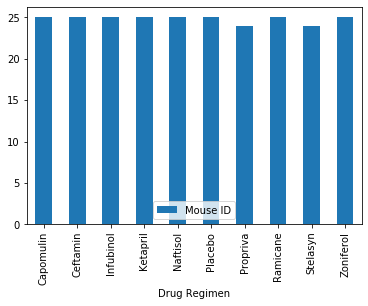

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Remove duplicate mouse enties
clean_id = clean_mouse_study.drop_duplicates("Mouse ID", keep="last")
clean_id


# Group by drug and count number of mice per drug
mice_per_drug = clean_id.groupby("Drug Regimen").count()
mice_per_drug.head()

# Drop all columns except for index(Drug) and Mouse ID.  
mice_per_drug_clean = mice_per_drug.drop(mice_per_drug.columns[1:7], axis=1)


mice_per_drug_clean.plot.bar()


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.







# Filter the DataFrame down only to those columns to chart
state_and_inches = rain_df[["State","Inches"]]

# Set the index to be "State" so they will be used as labels
state_and_inches = state_and_inches.set_index("State")

state_and_inches.head()
# Use DataFrame.plot() in order to create a bar chart of the data
state_and_inches.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Rain Per State")

plt.show()
plt.tight_layout()


In [13]:
clean_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


248
False    125
True     123
Name: Sex, dtype: int64
False    248
Name: Sex, dtype: int64
248


/Users/arselvargas/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


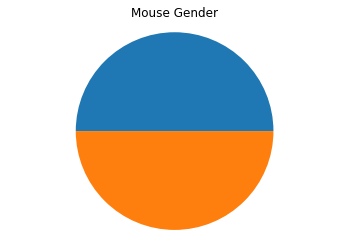

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dropped_id = clean_mouse_study.drop_duplicates(subset="Mouse ID", keep = "first")
print(len(dropped_id))

female_mice = dropped_id.loc[clean_mouse_study["Sex"] == "Female"].count()

gender = (dropped_id["Sex"] == "Female")
print(gender.value_counts())
#print(count())
female_count = (gender == "True").value_counts()
print(female_count)
male_count = (dropped_id["Sex"] == "Male").count()
print(male_count)

male_perc = male_count / len(clean_mouse_count)
female_perc = female_count / len(clean_mouse_count)

sex = ["Female", "Male"]
sex_results = [female_perc, male_perc]
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)

plt.title("Mouse Gender")
plt.pie(sex_results)
plt.axis("equal")
plt.show()


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


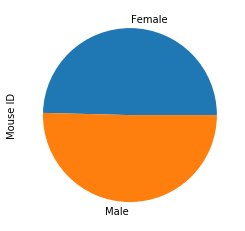

In [376]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Using previously created data frame that dropped duplicate mice (clean_id)
gender_group = clean_id.groupby("Sex")["Mouse ID"].count()
print(gender_group)
gender_group.plot.pie(y="Mouse ID")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

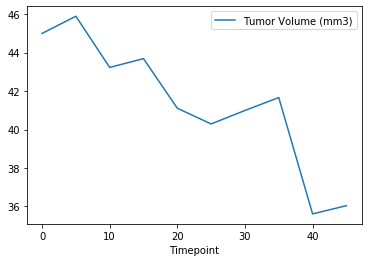

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
one_mouse = mouse_study.loc[mouse_study["Mouse ID"]=="w914", ]
one_mouse
one_mouse.plot.line(x="Timepoint", y="Tumor Volume (mm3)")


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin")]


#mean_tumor_campomulin = mouse_weight.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_tumor_campomulin = mouse_weight.loc[(mouse_weight["Mouse ID"]), (mouse_weight["Tumor Volume (mm3)"])]
print(mean_tumor_campomulin)

#Using previously calculate avergae tumor volume "mean_tumor_vol"
plt.scatter(mouse_weight["Weight (g)"], (mean_tumor_campomulin))
plt.xticks(mean_tumor_vol)
plt.xlabel("Tumor Volume")
plt.ylabel("Mouse Weight")
plt.show()

#mouse_weight


KeyError: "None of [Index(['b128', 'b128', 'b128', 'b128', 'b128', 'b128', 'b128', 'b128', 'b128',\n       'b128',\n       ...\n       'm601', 'm601', 'm601', 'm601', 'm601', 'm601', 'm601', 'm601', 'm601',\n       'm601'],\n      dtype='object', length=230)] are in the [index]"

In [17]:
clean_mouse_study.iloc[1] == "w914"

Mouse ID              False
Timepoint             False
Tumor Volume (mm3)    False
Metastatic Sites      False
Drug Regimen          False
Sex                   False
Age_months            False
Weight (g)            False
Name: 1, dtype: bool

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
